## Logistic 回归

Logistic regression 是一种简单的分类模型

In [10]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### sigmoid 函数

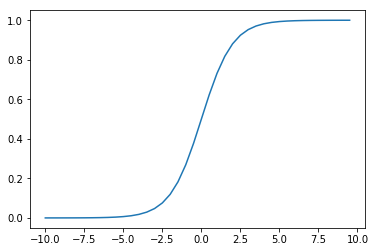

In [9]:
x = np.arange(-10, 10, 0.5)
y = 1 / (1 + np.exp(-x))
plt.plot(x, y);

### 梯度下降

In [13]:
!head testSet.txt

-0.017612	14.053064	0
-1.395634	4.662541	1
-0.752157	6.538620	0
-1.322371	7.152853	0
0.423363	11.054677	0
0.406704	7.067335	1
0.667394	12.741452	0
-2.460150	6.866805	1
0.569411	9.548755	0
-0.026632	10.427743	0


LR 梯度下降的参数更新: $\theta := \theta - \frac{\alpha}{m} X^T (g(X\theta) - y)$  

In [59]:
def load_dataset():
    data_mat = []
    label_mat = []
    with open('testSet.txt') as f:
        for line in f.readlines():
            line_arr = line.strip().split()
            data_mat.append([1.0, float(line_arr[0]), float(line_arr[1])])
            label_mat.append(int(line_arr[2]))
    return data_mat, label_mat

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def grad_descent(data, class_labels):
    """原书中为梯度上升, 这里改为梯度下降"""
    data_matrix = np.mat(data)
    label_mat = np.mat(class_labels).transpose()
    m, n = np.shape(data_matrix)
    alpha = 0.001
    max_cycles = 500
    weights = np.ones((n, 1))
    for k in range(max_cycles):
        h = sigmoid(data_matrix * weights)
        error = h - label_mat
        weights = weights - alpha * data_matrix.transpose() * error
    return weights.getA()  # 把 matrix 转为 ndarray

data_mat, label_mat = load_dataset()
grad_descent(data_mat, label_mat)

array([[ 4.12414349],
       [ 0.48007329],
       [-0.6168482 ]])

### 绘制决策界面

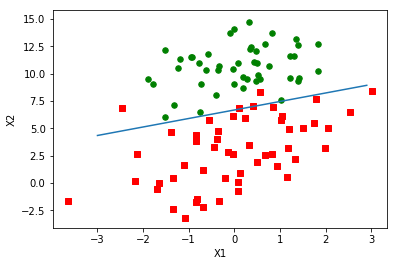

In [60]:
def plot_best_fit(weights):
    data_mat, label_mat = load_dataset()
    data_arr = np.array(data_mat)
    n = data_arr.shape[0]
    xcord1 = []
    ycord1 = []
    xcord2 = []
    ycord2 = []
    for i in range(n):
        if int(label_mat[i]) == 1:
            xcord1.append(data_arr[i, 1])
            ycord1.append(data_arr[i, 2])
        else:
            xcord2.append(data_arr[i, 1])
            ycord2.append(data_arr[i, 2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = np.arange(-3, 3, 0.1)
    y = (-weights[0] - weights[1] * x) / weights[2]
    ax.plot(x, y)
    plt.xlabel('X1')
    plt.ylabel('X2')

weights = grad_descent(data_mat, label_mat)
plot_best_fit(weights)

### 随机梯度下降

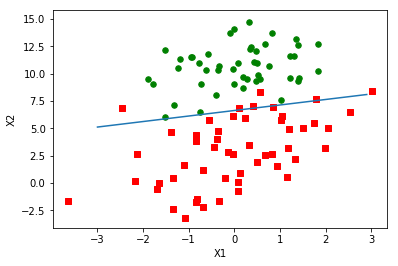

In [71]:
def sgd(data_matrix, class_labels, num_iter=150):
    m, n = np.shape(data_matrix)
    weights = np.ones(n)
    for j in range(num_iter):
        data_index = list(range(m))
        for i in range(m):
            alpha = 4 / (1 + j + i) + 0.01  # 动态调整学习率
            rand_index = int(np.random.uniform(0, len(data_index)))  # 随机选择样本
            h = sigmoid(np.sum(data_matrix[rand_index] * weights))
            error = h - class_labels[rand_index]
            weights = weights - alpha * error * data_matrix[rand_index]
            del(data_index[rand_index])
    return weights

weights_sgd = sgd(np.array(data_mat), label_mat)
plot_best_fit(weights_sgd)

### 示例: estimating horse fatalities from colic

原始数据集见 [UCI Machine Learning Repository: Horse Colic Data Set](http://archive.ics.uci.edu/ml/datasets/Horse+Colic). 

其中有 30% 的缺失值. 缺失值的处理方法可以是:
- 使用均值
- 使用特殊值如 -1
- 忽略有缺失值的样本
- 使用相似样本的均值
- 用某种机器学习算法预测缺失值

本例中将缺失值设为0. 特征取值为0时对结果的预测没有倾向性, 因为 sigmoid(0) = 0.5. 作者已将其处理为 `horseColicTest.txt` 和 `horseColicTraining.txt`.

In [73]:
def classify(input_, weights):
    prob = sigmoid(np.sum(input_ * weights))
    return 1 if prob > 0.5 else 0

def colic_test():
    training_set = []
    training_labels = []
    with open('horseColicTraining.txt') as f:
        for line in f.readlines():
            curr_line = line.strip().split('\t')
            line_arr = []
            for i in range(21):
                line_arr.append(float(curr_line[i]))
            training_set.append(line_arr)
            training_labels.append(float(curr_line[21]))    
    train_weights = sgd(np.array(training_set), training_labels, 500)

    error_count = 0
    num_test_vec = 0
    with open('horseColicTest.txt') as f:
        for line in f.readlines():
            num_test_vec += 1
            curr_line = line.strip().split('\t')
            line_arr = []
            for i in range(21):
                line_arr.append(float(curr_line[i]))
            if classify(np.array(line_arr), train_weights) != int(curr_line[21]):
                error_count += 1
    error_rate = error_count / num_test_vec
    print('the error rate of this test: {}'.format(error_rate))
    return error_rate

def multi_test():
    num_tests = 10
    error_sum = 0
    for k in range(num_tests):
        error_sum += colic_test()
    print('after {} iterations, the average error rate is {}'.format(
        num_tests, error_sum / num_tests))

multi_test()        

/Users/lim/.pyenv/versions/3.5.2/lib/python3.5/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in exp
  if sys.path[0] == '':


the error rate of this test: 0.29850746268656714
the error rate of this test: 0.2835820895522388
the error rate of this test: 0.43283582089552236
the error rate of this test: 0.373134328358209
the error rate of this test: 0.34328358208955223
the error rate of this test: 0.373134328358209
the error rate of this test: 0.29850746268656714
the error rate of this test: 0.4925373134328358
the error rate of this test: 0.40298507462686567
the error rate of this test: 0.26865671641791045
after 10 iterations, the average error rate is 0.3567164179104477


结果不算很好. 原因之一是数据集中有 30% 的数据缺失.